In [3]:
import fastai.vision.all as fv
import torch
import torch.nn as nn
import torch.nn.functional as F

from pathlib import Path

In [7]:
#!cd storage/Faces/ && unzip faces.zip

# Preparar los datos

In [4]:
path = Path('storage/Faces/faces/')

In [5]:
files = path.ls(); files

(#16738) [Path('storage/Faces/faces/22_puercoespin_gato_1_38856.jpg'),Path('storage/Faces/faces/20_hola_perro_1_20420.jpg'),Path('storage/Faces/faces/25_puercoespin_gato_0_15062.jpg'),Path('storage/Faces/faces/27_hola_gato_1_00623.jpg'),Path('storage/Faces/faces/18_adios_gato_1_23139.jpg'),Path('storage/Faces/faces/26_puercoespin_perro_0_65123.jpg'),Path('storage/Faces/faces/51_adios_perro_0_21394.jpg'),Path('storage/Faces/faces/82_hola_papa_0_49355.jpg'),Path('storage/Faces/faces/30_adios_perro_1_21174.jpg'),Path('storage/Faces/faces/30_hola_papa_0_48560.jpg')...]

In [6]:
files = fv.get_image_files('storage/Faces/faces')
files[0]

Path('storage/Faces/faces/22_puercoespin_gato_1_38856.jpg')

In [8]:
def obtener_edad(x):
    return float(x.name.split('_')[0])

In [9]:
def obtener_Hola(x):
    return (x.name.split('_')[1])

In [10]:
def obtener_Mama(x):
    return (x.name.split('_')[2])

In [11]:
def load_data(folder, img_size, batch_size):
    tmfs = fv.aug_transforms(size  = img_size,
                do_flip      = False,
                flip_vert    = False,
                max_rotate   = 10,
                max_lighting = 0.25,
                max_zoom     = 1.3, 
                max_warp     = 0.2) 
    data = fv.DataBlock(blocks    = (fv.ImageBlock, fv.RegressionBlock, fv.CategoryBlock, fv.CategoryBlock),
                        n_inp   = 1,
                        get_items = fv.get_image_files,
                        get_y     = [obtener_edad, obtener_Hola, obtener_Mama],
                        splitter  = fv.RandomSplitter(0.08),
                        item_tfms = fv.Resize(int(1.5*img_size)),
                        batch_tfms= tmfs)
    return data.dataloaders(folder, bs=batch_size)

In [12]:
obtener_Hola(files[0])

'puercoespin'

In [13]:
data = load_data(path, img_size=224, batch_size=128)

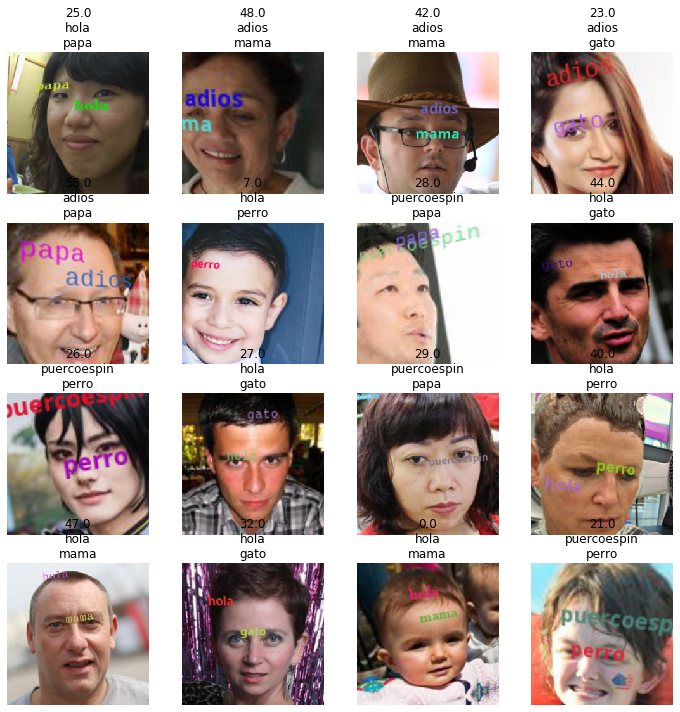

In [14]:
data.show_batch(max_n=16)

Se ve que ya se cargan bien los datos

In [15]:
b = data.one_batch()

In [16]:
b[0].shape

torch.Size([128, 3, 224, 224])

El primer elemento es una imagen

In [113]:
b[1].shape

torch.Size([128])

In [114]:
b[2].shape

torch.Size([128])

In [17]:
b[3].shape

torch.Size([128])

In [18]:
b[1]

tensor([ 5., 32., 19., 28., 23., 62., 38., 17., 61., 28.,  2., 22., 26., 72.,
        20., 58., 22., 46., 22., 35.,  1., 42., 31., 16., 20., 24., 18., 50.,
        23., 29., 54., 40., 27., 26., 20.,  5., 26., 23., 43., 42., 29., 34.,
        25., 26., 23.,  0., 33., 29.,  9., 47., 54., 43., 44.,  6., 27.,  6.,
        30.,  0., 50., 21., 48., 14., 24., 58., 29., 26., 32., 36., 25., 38.,
        43., 40., 28., 51., 30.,  9., 21., 61., 58., 22.,  2., 53., 70., 10.,
         4., 42., 42., 53.,  4.,  0., 44., 46.,  8., 33., 24., 46., 42., 32.,
        45., 30.,  0., 42., 67., 25., 29., 34., 18., 23., 22., 88., 11., 23.,
        36.,  1., 66., 19., 37., 37., 24., 44., 26., 28., 28., 34., 26.,  8.,
         4., 14.], device='cuda:0')

In [117]:
b[2]

TensorCategory([2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 2, 2, 0, 1, 2, 1, 1, 0, 2,
        0, 1, 2, 2, 1, 2, 1, 2, 0, 2, 0, 1, 1, 1, 1, 0, 2, 0, 2, 1, 1, 0, 1, 1,
        1, 0, 0, 0, 0, 2, 2, 1, 1, 2, 2, 2, 0, 2, 0, 1, 2, 0, 1, 1, 2, 1, 0, 1,
        1, 2, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1, 0, 1, 2, 0, 2, 2, 1, 2, 0, 0, 0, 1,
        0, 0, 2, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 2, 1,
        1, 2, 1, 0, 0, 2, 0, 2], device='cuda:0')

3 categorias

In [15]:
b[3]

TensorCategory([2, 1, 0, 2, 3, 1, 0, 1, 3, 1, 1, 3, 1, 3, 3, 0, 1, 0, 2, 3, 0, 1, 2, 2,
        3, 0, 0, 1, 1, 3, 3, 3, 2, 2, 2, 1, 1, 0, 0, 1, 0, 1, 1, 3, 2, 2, 1, 1,
        0, 3, 1, 2, 1, 0, 2, 0, 1, 2, 3, 0, 3, 3, 2, 3, 1, 1, 2, 1, 2, 3, 0, 2,
        0, 1, 2, 0, 3, 0, 2, 1, 1, 3, 2, 0, 2, 2, 1, 0, 2, 2, 0, 3, 1, 3, 3, 1,
        3, 0, 0, 0, 2, 3, 2, 3, 1, 0, 2, 0, 3, 2, 1, 1, 3, 0, 0, 1, 3, 2, 2, 1,
        1, 2, 2, 2, 2, 1, 2, 2], device='cuda:0')

4 categorias

Para trabajar tenemos un tensor y dos tensor category

# Crear el modelo

In [19]:
#Cargamos resnet preentrenado
layers = list( fv.resnet18(pretrained=True).children())[:-1]
layers += [fv.Flatten(), nn.Linear(512,8)]

Flatten quita las dimensiones 1 y con Linear (512, 8) le decimos que regrese 8 cosas(valores)

In [20]:
model = nn.Sequential(*layers)

In [48]:
model

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

Probamos el modelo con una imagen aleatoria. bs=1, 3 canales, img_size=128x128

In [21]:
model(torch.rand(1,3,128,128))

tensor([[-0.0252, -0.2060,  0.2384, -0.3784,  0.5381,  0.1750,  0.2337,  0.5379]],
       grad_fn=<AddmmBackward>)

El modelo si nos regresa 8 números

Con esto revisamos que el modelo funcione (no que ya funcione bien). Principalmente es para revisar que el número de canales corresponda a lo que queremos

# Crear el Learner

Debemos crear nuestra función de pérdida. Debemos saber qué es lo que va a recibir loss_func

In [22]:
#Funcion para checar qué es lo que le pasa data a la función de error
def checar_data2loss_func(*args):
    print (args,"\n") #Imprime
    raise #Le pedimos a la función que nos regrese un error

Es importante revisar qué recibe ***loss_func*** porque los datos ya pasaron por el modelo. 
- EL análisis anterior de ***one_batch*** es para antes de que los datos pasen por el modelo

In [23]:
learner = fv.Learner(data, model, loss_func=checar_data2loss_func )

In [24]:
learner.lr_find()

(tensor([[ 0.1106, -0.1392, -0.1968,  ...,  0.0347,  0.4827,  0.5025],
        [ 0.2593,  0.0814,  0.3094,  ...,  0.3333,  0.4015, -0.0566],
        [ 0.7454, -0.1729,  1.0543,  ...,  0.5939,  0.8161,  0.8218],
        ...,
        [ 0.0226, -0.7640,  0.1804,  ...,  0.0026, -0.1270,  1.6506],
        [ 0.0458, -0.2034, -0.5344,  ..., -0.6506,  0.0680,  0.4732],
        [-0.3526,  0.2510, -0.4864,  ...,  0.5987, -0.1267,  0.5451]],
       device='cuda:0', grad_fn=<AddmmBackward>), tensor([31., 25.,  5., 33., 28., 30., 26., 20., 26., 24., 12., 27., 46., 31.,
        60., 37., 42., 34., 46., 40., 62., 25., 18., 31., 12., 33., 34., 33.,
        23., 22.,  5.,  2., 26., 21., 49., 40., 44., 29., 28., 24., 64., 31.,
        27.,  8., 45., 37., 25., 38., 26., 25., 16.,  0.,  3.,  3.,  1.,  8.,
        78.,  5., 21., 29., 30.,  7.,  5., 24., 22., 10., 38., 67., 43., 10.,
         5., 18., 59., 35., 26., 31., 27., 20., 27., 15., 22., 13., 60., 38.,
        38., 34., 29., 39., 10., 20., 27., 27.,

RuntimeError: No active exception to reraise

**(Este error es provocado a drede)**

Regresa 4 tensores: 
1. La imágen pasada por el modelo
2. Las edades
3. Las categorías de la primera cosa
4. Las categorías de la segunda cosa

#### Ahora vamos a revisar los tamaños de las cosas que regresó

In [21]:
#Funcion para checar los tamaños de lo que le pasa data a la función de error
def checar_tamanio_data2loss_func(*args):
    print ([arg.shape for arg in args])
    raise #Le pedimos a la función que nos regrese un error

In [22]:
learner = fv.Learner(data, model, loss_func=checar_tamanio_data2loss_func )

In [23]:
learner.lr_find()

[torch.Size([128, 8]), torch.Size([128]), torch.Size([128]), torch.Size([128])]


RuntimeError: No active exception to reraise

**Este error es povocado**

Lo que nos regresa es:
1. El output de la Red Neuronal
2. *Las edades*
3. *Categoria 1*
4. *Categoria 2*

**Predicciones*

> [torch.Size([128, 8]), torch.Size([128]), torch.Size([128]), torch.Size([128])]


#### Crear la funcion de pérdida

Ahora, después de hacer el análisis y las comproaciones:
> Tenemos tres cosas predichas

In [25]:
def mi_funcion_error (y_pred, edad, cat_Hola, cat_Mama):
    pred_Edad = y_pred[:,0] #El primero de los 8 para la edad
    pred_Hola = y_pred[:,1:4] #Los siguientes tres para categoría 1
    pred_Mama = y_pred[:,4:]  #Los últimsos 4 para categoría 2
    
    return F.mse_loss(pred_Edad, edad)/10 + F.cross_entropy(pred_Hola, cat_Hola) + F.cross_entropy(pred_Mama, cat_Mama)

*Aquí me daba error de memoria*

In [26]:
data = load_data(path, img_size=128, batch_size=100)

In [27]:
learner = fv.Learner(data, model, loss_func=mi_funcion_error).to_fp16()

SuggestedLRs(lr_min=0.2754228591918945, lr_steep=2.290867567062378)

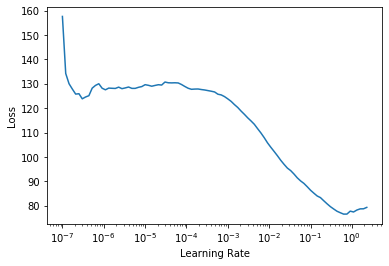

In [27]:
learner.lr_find()

In [28]:
learner.fit_one_cycle(1)

epoch,train_loss,valid_loss,time
0,16.290663,7.545757,00:39


Crear las métricas

In [29]:
def L1_Edad (y_pred, edad, cat_Hola, cat_Mama):
    pred_Edad = y_pred[:,0] #El primero de los 8 para la edad
    
    return F.l1_loss(pred_Edad, edad)

In [30]:
def Accuracy_Edad (y_pred, edad, cat_Hola, cat_Mama):
    pred_Edad = y_pred[:,0] #El primero de los 8 para la edad
    
    return fv.accuracy(pred_Edad, edad)

In [31]:
def Accuracy_Hola (y_pred, edad, cat_Hola, cat_Mama):
    pred_Hola = y_pred[:,1:4] #El primero de los 8 para la edad
    
    return fv.accuracy(pred_Hola, cat_Hola)

In [32]:
def Accuracy_Mama (y_pred, edad, cat_Hola, cat_Mama):
    pred_Mama = y_pred[:,4:]
    
    return fv.accuracy(pred_Mama, cat_Mama)

In [33]:
def Cross_Entropy_Hola(y_pred, edad, cat_Hola, cat_Mama):
    return F.cross_entropy(y_pred[:,1:4], cat_Hola)

In [34]:
def Cross_Entropy_Mama(y_pred, edad, cat_Hola, cat_Mama):
    return  F.cross_entropy(y_pred[:,4:], cat_Mama)

In [35]:
class Normalizer(nn.Module):
    def __init__(self, mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225]):
        super().__init__()
        self.mean = torch.tensor(mean)[None,:,None,None]
        self.std  = torch.tensor(std)[None,:,None,None]
        
    def forward(self, x):
        m = self.mean.to(x)
        s = self.std.to(x)
        return (x - m)/s

In [36]:
def create_learner(**kwards):
    learn = fv.Learner(data, model, opt_func=fv.ranger, normalize=False, **kwards)
    learn.model = nn.Sequential(Normalizer(), learn.model)
    return learn.to_fp16()

In [37]:
mis_metricas = [L1_Edad,
        Cross_Entropy_Hola,Accuracy_Hola,
        Cross_Entropy_Mama,Accuracy_Mama]

In [38]:
learner = create_learner(metrics=mis_metricas ,loss_func=mi_funcion_error )

In [39]:
learner.validate()

(#6) [42.160457611083984,15.122584342956543,1.1125822067260742,0.324869304895401,1.394890308380127,0.2374906688928604]

SuggestedLRs(lr_min=0.0005248074419796466, lr_steep=6.309573450380412e-07)

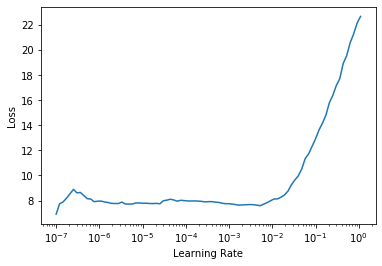

In [40]:
learner.lr_find()

In [40]:
learner.fit_one_cycle(1,1e-3, div=0.9, final_div=10000, pct_start=0.7)

epoch,train_loss,valid_loss,L1_Edad,Cross_Entropy_Hola,Accuracy_Hola,Cross_Entropy_Mama,Accuracy_Mama,time
0,7.222991,6.437973,4.526699,1.096827,0.337565,1.391562,0.252427,00:37


Hasta aquí el modelo ya se puede entrenar.
- Falta congelarlo -- splitter
- Entrenar la última capa -- Entenarlo con optimizadores demás parámetros

##### Congelar el modelo

In [41]:
learner.freeze_to(-1)

Partir las capas para entrenar más las últimas que las primeras

In [44]:
model

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [42]:
def my_own_splitter(model): #Tú eliges cómo dividirlos. La última parte (lineal), debe tener su propio grupo
    print(len(model))
    return [list(group.parameters()) for group in [model[0:4],model[4],model[5],model[6],model[7],model[8:]]]

In [43]:
def create_learner(**kwards):
    print(len(model))
    learn = fv.Learner(data, model, opt_func=fv.ranger, normalize=False, **kwards)
    print(len(model))
    learn.model = nn.Sequential(Normalizer(), learn.model)
    return learn.to_fp16()

In [44]:
learner = create_learner(metrics=mis_metricas ,loss_func=mi_funcion_error)

11
11


In [45]:
model[10]

Linear(in_features=512, out_features=8, bias=True)

In [57]:
#my_own_splitter(model)

In [46]:
learner.fit_one_cycle(15,slice(1e-6, 1e-3), div=0.9, final_div=10000, pct_start=0.7)

epoch,train_loss,valid_loss,L1_Edad,Cross_Entropy_Hola,Accuracy_Hola,Cross_Entropy_Mama,Accuracy_Mama,time
0,6.530116,11.757192,7.211256,1.117337,0.348021,1.402326,0.259895,00:37
1,6.515011,14.922257,8.565701,1.096607,0.362211,1.406331,0.247946,00:38
2,6.227558,7.398596,5.114921,1.096956,0.356983,1.438602,0.247199,00:38
3,5.823833,6.379150,4.535151,1.053800,0.419716,1.389432,0.247199,00:37
4,5.824003,9.064437,5.979298,1.079364,0.421210,1.406827,0.247199,00:38
5,5.477944,5.607589,4.307509,0.822393,0.563854,1.393734,0.271098,00:38
6,5.267453,13.443864,7.586578,0.782498,0.592233,1.402668,0.262883,00:37
7,5.036286,5.403614,4.199125,0.735149,0.598954,1.391230,0.265870,00:37
8,4.729859,9.680470,6.400924,0.722616,0.604182,1.419329,0.251680,00:38
9,4.770383,5.350250,4.201396,0.670926,0.649739,1.384407,0.265123,00:38


In [47]:
#learner.unfreeze()

In [71]:
learner.fit_one_cycle(15,slice(1e-6, 1e-3), div=0.9, final_div=10000, pct_start=0.7)

epoch,train_loss,valid_loss,L1_Edad,Cross_Entropy_Hola,Accuracy_Hola,Cross_Entropy_Mama,Accuracy_Mama,time
0,3.636061,5.378175,4.233277,0.653492,0.659447,1.381730,0.301718,00:38
1,3.712945,6.451149,4.770242,0.745183,0.634055,1.398414,0.247199,00:37
2,3.697225,6.316245,4.889485,0.658469,0.662435,1.383539,0.287528,00:37
3,3.723444,5.368259,4.136376,0.689912,0.655713,1.397305,0.268111,00:37
4,3.716482,5.709650,4.376633,0.726298,0.628081,1.393799,0.268857,00:37
5,3.648741,8.371470,5.411506,0.769167,0.611650,1.417415,0.238984,00:37
6,3.642282,5.437846,4.312467,0.636556,0.673637,1.378704,0.283794,00:37
7,3.509381,6.533349,4.887251,0.647509,0.678118,1.409442,0.263630,00:37
8,3.474676,5.205407,4.168768,0.638594,0.684839,1.375487,0.300224,00:37
9,3.392035,5.871899,4.544538,0.679317,0.659447,1.397647,0.264376,00:39


Como casi no mejoraron los resultados de la edad ni de mama, voy a modificar la fucncion de pérdida

In [48]:
def mi_funcion_error (y_pred, edad, cat_Hola, cat_Mama):
    pred_Edad = y_pred[:,0] #El primero de los 8 para la edad
    pred_Hola = y_pred[:,1:4] #Los siguientes tres para categoría 1
    pred_Mama = y_pred[:,4:]  #Los últimsos 4 para categoría 2
    
    return F.mse_loss(pred_Edad, edad)/8 + F.cross_entropy(pred_Hola, cat_Hola)*.8 + F.cross_entropy(pred_Mama, cat_Mama)*1.2

In [49]:
learner = create_learner(metrics=mis_metricas ,loss_func=mi_funcion_error)

11
11


In [50]:
learner.fit_one_cycle(15,slice(1e-6, 1e-3), div=0.9, final_div=10000, pct_start=0.7)

epoch,train_loss,valid_loss,L1_Edad,Cross_Entropy_Hola,Accuracy_Hola,Cross_Entropy_Mama,Accuracy_Mama,time
0,3.973932,6.877958,4.498208,0.635038,0.669156,1.382684,0.297984,00:38
1,4.351594,6.997732,4.436781,0.636916,0.658701,1.381117,0.280060,00:38
2,4.388162,7.476470,4.820002,0.643803,0.653473,1.388105,0.274832,00:38
3,4.289819,6.539292,4.294417,0.649306,0.660941,1.383002,0.280060,00:38
4,4.522681,6.608819,4.322919,0.625265,0.677371,1.385766,0.303211,00:38
5,4.320685,6.261589,4.238801,0.608882,0.690067,1.360780,0.305452,00:38
6,4.434518,8.959284,5.406722,0.629684,0.671397,1.416448,0.297237,00:38
7,4.282903,5.997560,3.974020,0.610740,0.681852,1.367903,0.306199,00:38
8,4.066119,8.579532,5.045278,0.624112,0.664675,1.378278,0.277072,00:38
9,4.123132,7.014637,4.466305,0.635251,0.684093,1.373583,0.294996,00:38


In [51]:
def mi_funcion_error (y_pred, edad, cat_Hola, cat_Mama):
    pred_Edad = y_pred[:,0] #El primero de los 8 para la edad
    pred_Hola = y_pred[:,1:4] #Los siguientes tres para categoría 1
    pred_Mama = y_pred[:,4:]  #Los últimsos 4 para categoría 2
    
    return F.mse_loss(pred_Edad, edad)/8 + F.cross_entropy(pred_Hola, cat_Hola)*.8 + F.cross_entropy(pred_Mama, cat_Mama)*10

learner = create_learner(metrics=mis_metricas ,loss_func=mi_funcion_error)

11
11


In [52]:
learner.fit_one_cycle(15,slice(1e-6, 1e-3), div=0.9, final_div=1000, pct_start=0.7)

epoch,train_loss,valid_loss,L1_Edad,Cross_Entropy_Hola,Accuracy_Hola,Cross_Entropy_Mama,Accuracy_Mama,time
0,14.545696,17.719156,4.026736,0.643208,0.665422,1.331878,0.336819,00:38
1,14.478581,17.370750,4.084741,0.643756,0.660941,1.285958,0.360717,00:38
2,14.107889,17.734751,4.474859,0.689906,0.617625,1.246618,0.407020,00:38
3,12.452636,15.204736,4.627676,0.664639,0.631815,0.980597,0.582524,00:38
4,10.691072,14.308765,4.304659,0.684616,0.628081,0.929209,0.619866,00:38
5,9.410339,12.065802,4.189078,0.640389,0.644511,0.733695,0.708738,00:38
6,8.631083,15.976694,5.790132,0.650401,0.626587,0.770288,0.682599,00:38
7,8.100862,11.083908,4.375584,0.626845,0.639283,0.610175,0.743092,00:38
8,7.474694,11.327805,4.451191,0.607984,0.643017,0.597744,0.771471,00:38
9,7.066556,11.906022,4.433124,0.610202,0.630321,0.675474,0.765497,00:38


Se ve que ya mejoró bastante la accuracy de Mama.